In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.reshape(60000, 28, 28, 1)  #add 1 additional channel
x_test = x_test.reshape(10000, 28, 28, 1)

In [6]:
x_train[9487].shape

(28, 28, 1)

In [7]:
X = x_train[9487][:, :, 0]

In [8]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

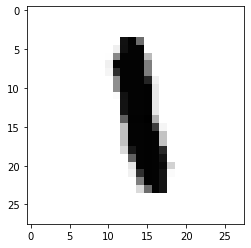

In [9]:
plt.imshow(X, cmap = 'Greys')

In [10]:
from keras.utils import np_utils

In [11]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [12]:
from keras.models import Sequential #Open a new nueral network
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD 

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (28, 28, 1)))  #1st
model.add(Activation('sigmoid'))

In [15]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [16]:
model.add(Conv2D(64, (3,3), padding = 'same'))  #input_shape don't need to set  #2nd
model.add(Activation('sigmoid'))


In [17]:
model.add(MaxPooling2D(pool_size = (2, 2))) 

In [18]:
model.add(Conv2D(128, (3,3), padding = 'same'))  #input_shape don't need to set  #3rd
model.add(Activation('sigmoid'))


In [19]:
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Flatten())
model.add(Dense())
model.add(Activatio('relu'))

In [20]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('sigmoid'))

In [21]:
model.add(Dense(10))       #output layer
model.add(Activation('softmax'))

In [22]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.05), metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

# (3*3) parameters //filter 
# 32 filters  each with 1 bias
#(3*3 + 1) * 32 = 320


In [24]:
model.fit(x_train, y_train, batch_size = 100, epochs = 12)


Epoch 1/12
13300/60000 [=====>........................] - ETA: 1:49 - loss: 0.0909 - accuracy: 0.1115

KeyboardInterrupt: 

In [25]:
score = model.evaluate(x_test, y_test)

NameError: name 'model' is not defined

In [26]:
print("loss : ", score[0])
print("acc : ", score[1])

NameError: name 'score' is not defined